**Email Spam Detection **

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

def warn(*args, **kwargs):
    pass
warnings.warn = warn

In [63]:
# Reading the dataset
df = pd.read_csv('/content/spam.csv',  encoding='ISO-8859-1')

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


<Axes: >

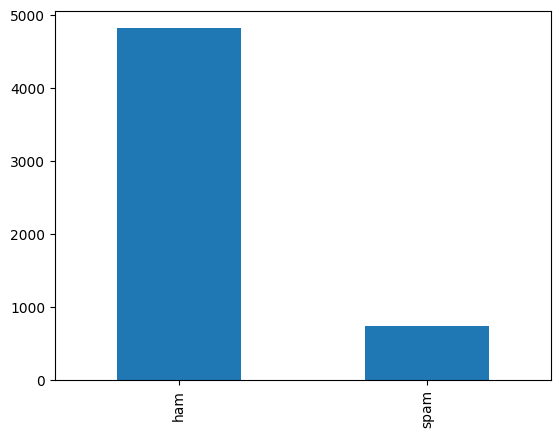

In [64]:
df['v1'].value_counts().plot(kind='bar')

In [65]:
len(df)

# Check for null values
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [66]:
# Dropping unnamed columns
df = df[['v1', 'v2']]

df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [67]:
# Check for number of unique values
df.nunique()

v1       2
v2    5169
dtype: int64

In [68]:
# Implementing the T-Test
from scipy import stats

df['v2_length'] = df['v2'].apply(len)

hams = df[df['v1'] == 'ham']['v2_length']
spams = df[df['v1'] == 'spam']['v2_length']

t_stat, p_value = stats.ttest_ind(hams, spams)

alpha = 0.05

if p_value < alpha:
    print('The difference in sms lengths are significance')
else:
    print('The difference in sms lengths are not significance')

print(f'T-Stat: {t_stat}')
print(f'P-Value: {p_value}')

The difference in sms lengths are significance
T-Stat: -31.350650338992136
P-Value: 7.702078585492358e-199


In [69]:
# Separating X and y
X = df['v2']
y = df['v1']

display(X, y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object

In [70]:
# Encoding the Labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

display(y)

array([0, 0, 1, ..., 0, 0, 0])

In [71]:
# Train and Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [72]:
# Import basic libraries
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [73]:
# Create a function to perform classification metrics
def show_metrics(y_true, y_pred, grid_search=None):
    from sklearn.metrics import (classification_report,
                                 confusion_matrix,
                                 ConfusionMatrixDisplay)

    print('-' * 20)
    print(classification_report(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))

    if grid_search:
        print('-' * 20)
        print(grid_search.best_params_)

In [42]:
!pip install scikit-learn

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
# Creating the NB pipeline
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('classifier', MultinomialNB())])

grid_params_nb = {
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__stop_words': [None, 'english'],
    'classifier__alpha': [0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 5.0, 10.0]
}

model_nb = GridSearchCV(pipeline, grid_params_nb, cv=5, scoring='accuracy')
model_nb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('classifier', MultinomialNB())]),
             param_grid={'classifier__alpha': [0.01, 0.1, 0.5, 1.0, 1.5, 2.0,
                                               2.5, 5.0, 10.0],
                         'tfidf__ngram_range': [(1, 1), (1, 2)],
                         'tfidf__stop_words': [None, 'english']},
             scoring='accuracy')

In [45]:
# NB metrics
best_nb = model_nb.best_estimator_
y_pred_nb = best_nb.predict(X_test)

show_metrics(y_test, y_pred_nb, model_nb)

--------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1464
           1       0.96      0.92      0.94       208

    accuracy                           0.99      1672
   macro avg       0.97      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672

[[1456    8]
 [  16  192]]
--------------------
{'classifier__alpha': 0.01, 'tfidf__ngram_range': (1, 2), 'tfidf__stop_words': None}


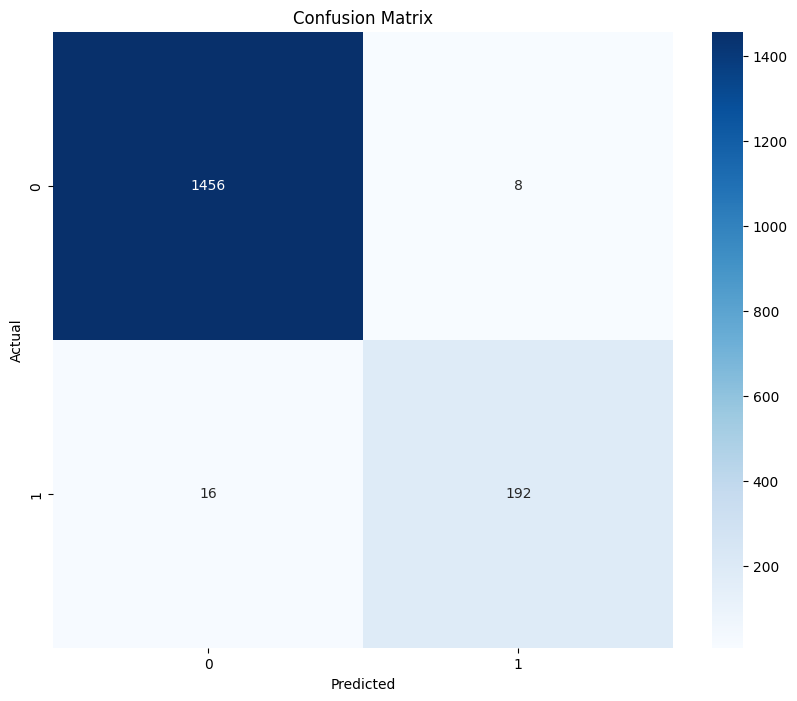

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fit the model on the training data
model_nb.fit(X_train, y_train)

# Predict the labels
y_pred = model_nb.predict(X_test)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=model_nb.classes_, yticklabels=model_nb.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


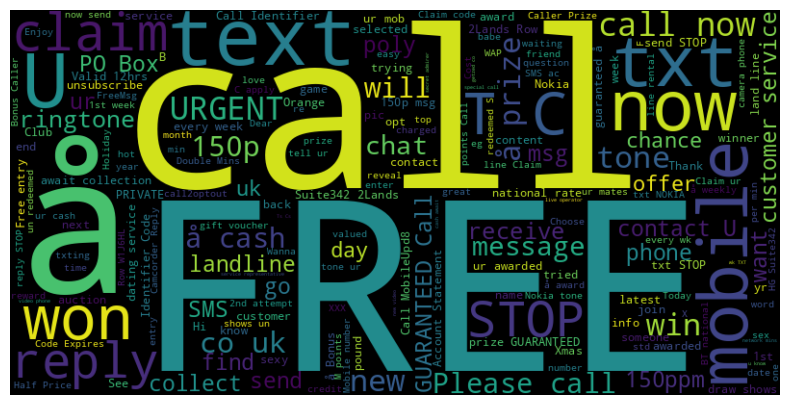

In [61]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

spam_words = ' '.join(list(df[df['v1']=='spam']['v2']))
wordcloud = WordCloud(width=800, height=400).generate(spam_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
_ = plt.axis('off')